In [12]:
# Clone the repository from GitHub
!git clone https://github.com/pallavikailas/pap-smear-for-cancer.git /content/project_root

fatal: destination path '/content/project_root' already exists and is not an empty directory.


In [13]:
# Install necessary dependencies (if you have a requirements.txt file)
!pip install -r /content/project_root/requirements.txt

In [14]:
# Adjust Python import path
import sys
sys.path.append('/content/project_root/src')  # Add the src directory to the path

In [15]:
# Import the get_data function from dataloader.py
from data_loader import get_data

# Load training data
x_train, y_train = get_data("/content/project_root/data/train")
x_val, y_val = get_data("/content/project_root/data/validation")

In [23]:
# Check if data is loaded correctly
print(f"Features shape: {x_train.shape}, {x_val.shape}")
print(f"Labels shape: {y_train.shape}, {y_val.shape}")

Features shape: (643, 350), (274, 350)
Labels shape: (643,), (274,)


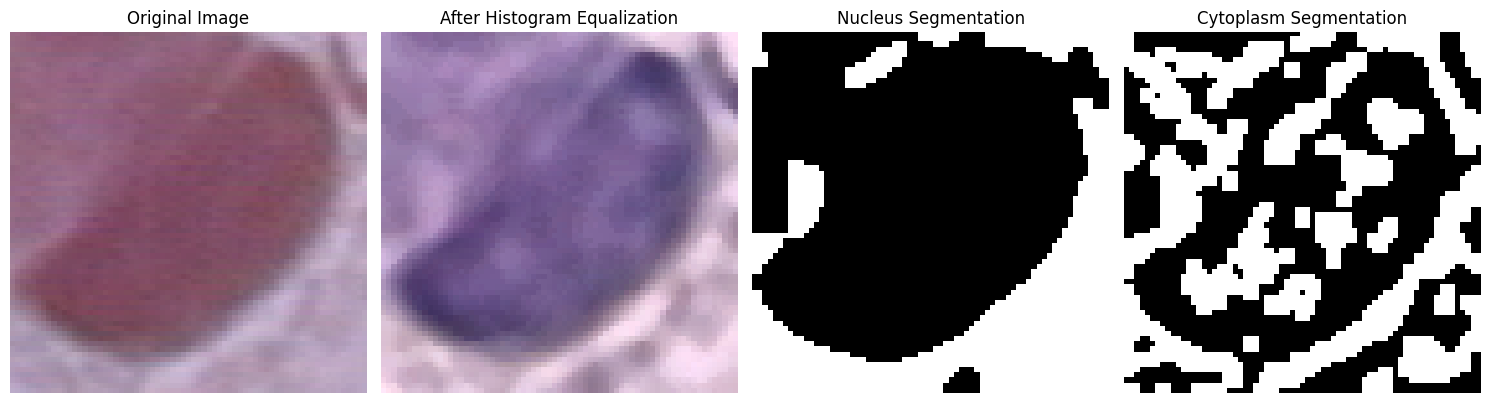

In [24]:
from feature_extraction import analyze_pap_smear, visualize_results
import cv2

# Path to an example image
image_path = "/content/project_root/data/train/carcinoma_in_situ/149143370-149143378-001.BMP"

# Analyze and visualize
features_normalized, img_eq, nucleus_mask, cytoplasm_mask = analyze_pap_smear(image_path)
visualize_results(cv2.imread(image_path), img_eq, nucleus_mask, cytoplasm_mask)

In [25]:
from train import train_random_forest, train_knn, train_svm
from sklearn.model_selection import train_test_split

# Train models
rf_model = train_random_forest(x_train, y_train)
knn_model = train_knn(x_train, y_train)
svm_model = train_svm(x_train, y_train)

In [26]:
from evaluate import evaluate_model

# Evaluate each model
print("Random Forest:")
evaluate_model(rf_model, x_val, y_val)

print("KNN:")
evaluate_model(knn_model, x_val, y_val)

print("SVM:")
evaluate_model(svm_model, x_val, y_val)

Random Forest:
F1-Score: 31.30%
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.40      0.41        45
           1       0.38      0.39      0.38        54
           2       0.15      0.09      0.12        43
           3       0.00      0.00      0.00        29
           4       0.51      0.95      0.67        21
           5       1.00      0.61      0.76        23
           6       0.16      0.19      0.17        59

    accuracy                           0.32       274
   macro avg       0.38      0.38      0.36       274
weighted avg       0.33      0.32      0.31       274

KNN:
F1-Score: 28.94%
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        45
           1       0.34      0.50      0.41        54
           2       0.11      0.12      0.11        43
           3       0.17      0.24      0.20        29
           4       0.29      0

In [27]:
from sklearn.metrics import accuracy_score

rf_acc = accuracy_score(y_val, rf_model.predict(x_val))
knn_acc = accuracy_score(y_val, knn_model.predict(x_val))
svm_acc = accuracy_score(y_val, svm_model.predict(x_val))
accuracies = [rf_acc, knn_acc, svm_acc]

In [28]:
from ensemble import evaluate_ensemble

# Evaluate ensemble model
evaluate_ensemble([rf_model, knn_model, svm_model], x_val, y_val, accuracies)

Predictions shape: (3, 274, 7)
Normalized Weights: [0.33460076 0.30038023 0.36501901]
Weighted Predictions: [0.02853028 0.2520308  0.23200786 0.03237817 0.30463363 0.08737446
 0.06304481]
Ensemble F1-Score: 34.18%


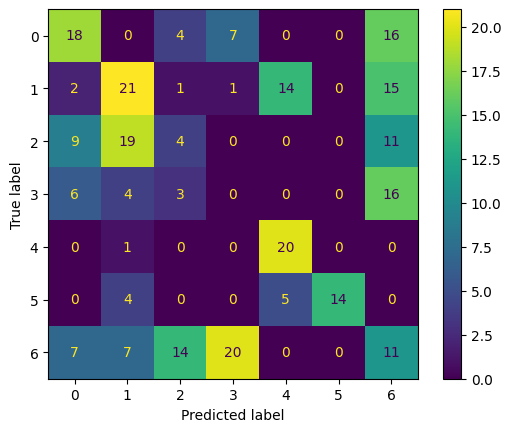

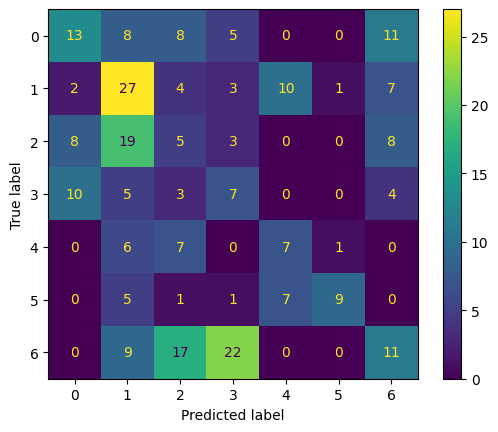

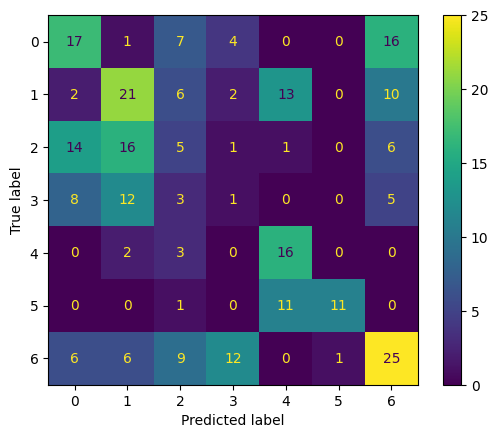

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, x_val, y_val)
plt.show()

# Display confusion matrix for KNN
ConfusionMatrixDisplay.from_estimator(knn_model, x_val, y_val)
plt.show()

# Display confusion matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm_model, x_val, y_val)
plt.show()